In [2]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#tips.csv is a part of Seaborn's standard documentation
tips_data = pd.read_csv('datasets/tips.csv')
tips_data.sample(10)

,total_bill,tip,sex,smoker,day,time,size
130,19.08,1.50,Male,No,Thur,Lunch,2
118,12.43,1.80,Female,No,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
43,9.68,1.32,Male,No,Sun,Dinner,2
144,16.43,2.30,Female,No,Thur,Lunch,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
94,22.75,3.25,Female,No,Fri,Dinner,2
139,13.16,2.75,Female,No,Thur,Lunch,2
193,15.48,2.02,Male,Yes,Thur,Lunch,2
90,28.97,3.00,Male,Yes,Fri,Dinner,2


In [5]:
tips_data.shape

(244, 7)

In [6]:
#a quick statistical overview of what this data looks like
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips_data.groupby(by = 'time').mean()

,total_bill,tip,size
time,,,
Dinner,20.797159,3.102670,2.630682
Lunch,17.168676,2.728088,2.411765


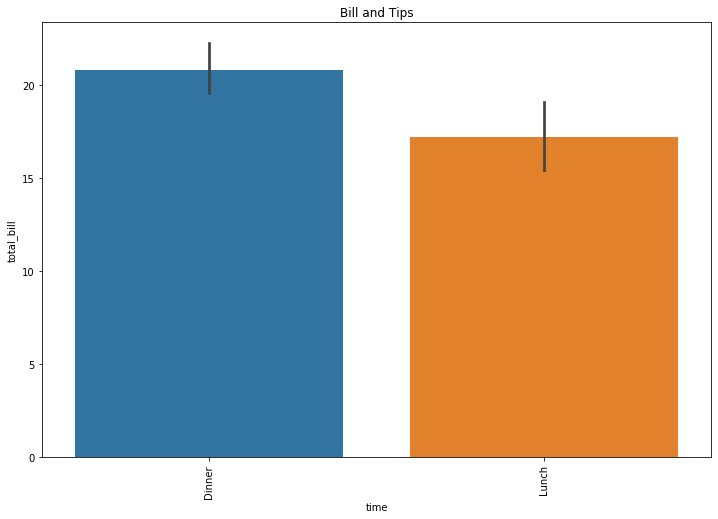

In [9]:
#since we have a sense of the data, let's use Seaborn plots to visualize this
plt.figure(figsize = (12, 8))
#we'll first view the bar plot
sns.barplot(x = 'time', y = 'total_bill', data = tips_data)

plt.title('Bill and Tips')
plt.xticks(rotation = 90)
plt.show()

In [10]:
mean = tips_data['tip'].mean()
mean

2.9982786885245902

In [11]:
#categorize all of the tip data to be above or below average
#true when the tip is above average, false when it's bellow the average
tips_data['above average'] = (tips_data['tip'] - mean) > 0
tips_data[['tip', 'above average']].head(5)

,tip,above average
0,1.01,False
1,1.66,False
2,3.50,True
3,3.31,True
4,3.61,True


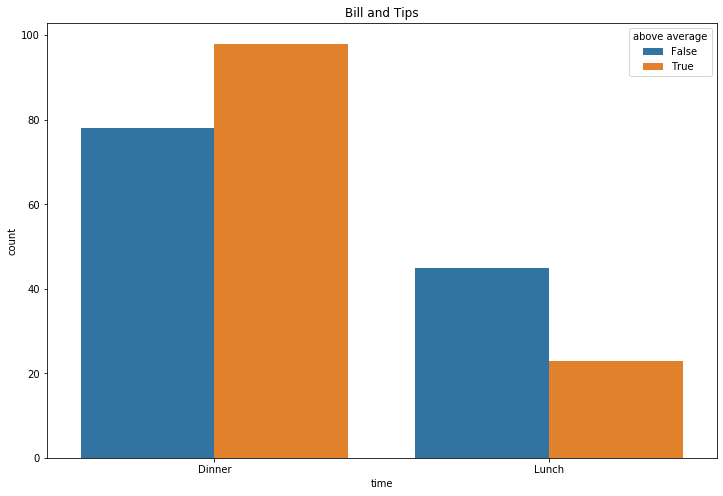

In [12]:
#countplot to see how many parties paid above average tips
#and below average tips for lunch and dinner
plt.figure(figsize = (12, 8))
sns.countplot('time',
             hue = 'above average', #hue will be based on whether the tip is above average or not
             data = tips_data,
             order = tips_data['time'].value_counts().index)
plt.title('Bill and Tips')
plt.show()

#the seaborn countplot is simply a bar graph representation
#where the height of the bar represents the number of instances
#in each of these categories

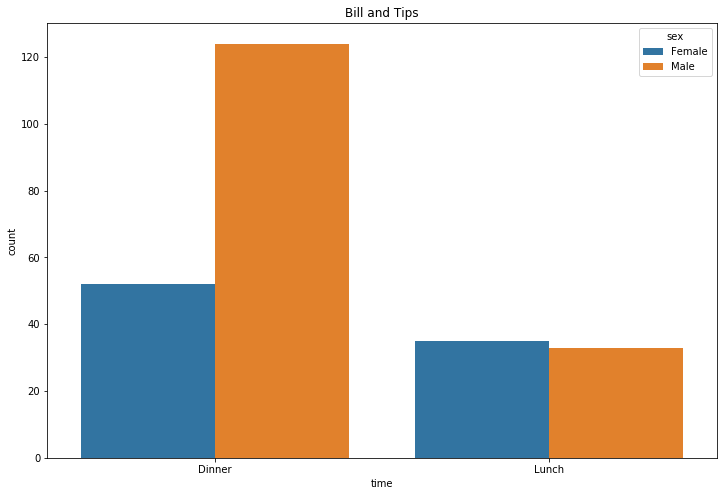

In [13]:
#let's get some info about whether the bills are being paid by males or females
#across lunch and dinner
plt.figure(figsize = (12, 8))
sns.countplot('time',
             hue = 'sex', #the hue will represent gender information
             data = tips_data,
             order = tips_data['time'].value_counts().index)
plt.title('Bill and Tips')
plt.show()

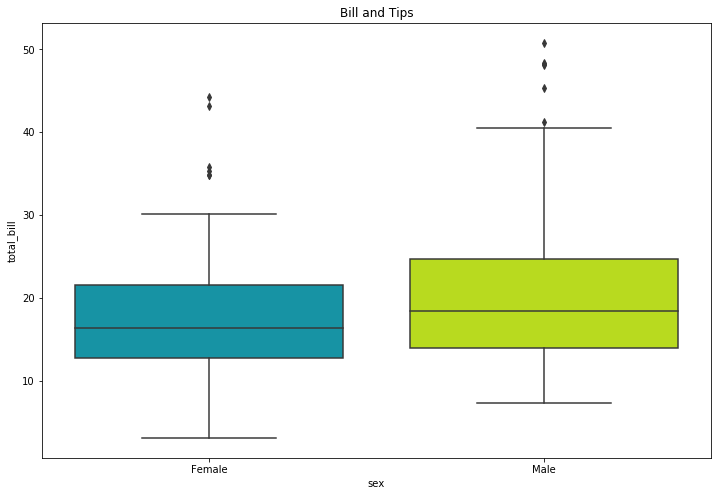

In [15]:
#let's view a box plot representation of how the total
#bill is distributed based on gender
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'sex',
           y = 'total_bill',
           data = tips_data,
           palette = 'nipy_spectral')
plt.title('Bill and Tips')
plt.show()

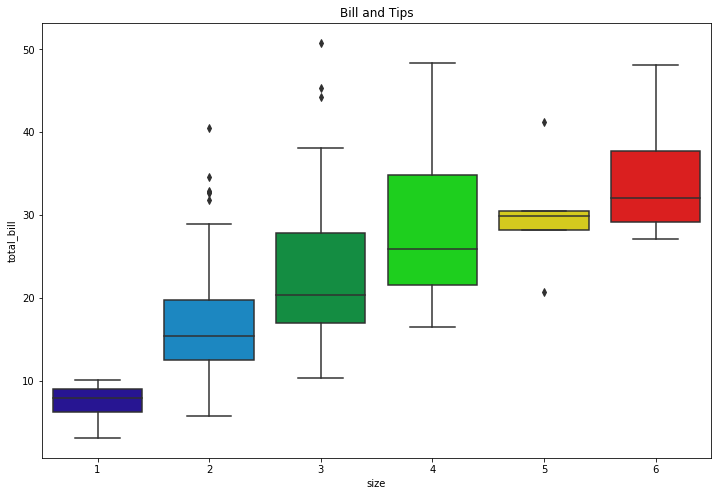

In [16]:
#form of a box plot
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'size',
           y = 'total_bill',
           data = tips_data,
           palette = 'nipy_spectral')
plt.title('Bill and Tips')
plt.show()

#there is a linear relationship between party size and the total bill

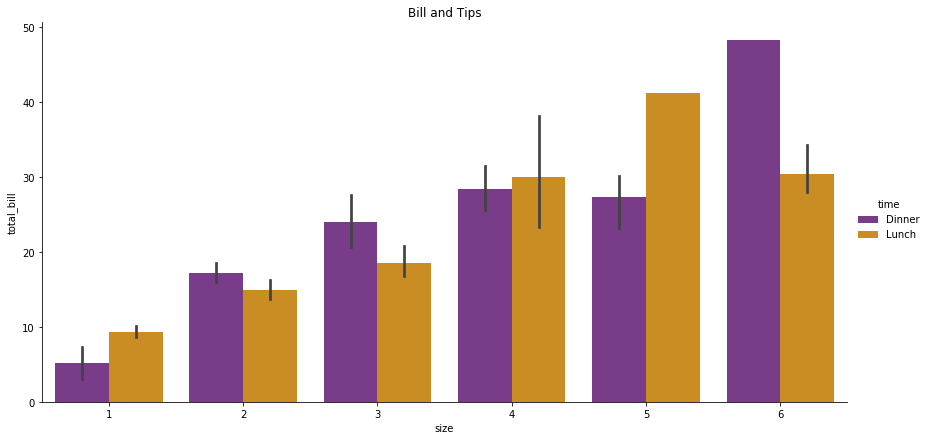

In [19]:
#the size of the dining party is a categorical variable
#it can only take on discrete values, such as 1, 2, 3, 4 etc
#a seaborn plot tailored for categorical data is the catplot
sns.catplot(x = 'size',
           y = 'total_bill',
           hue = 'time',
           data = tips_data,
           #the catplot func allows to specify different kinds of plots, kind = bar, a bar graph will be displayed
           kind = 'bar', height = 6, aspect = 2,
           palette = 'CMRmap')
plt.title('Bill and Tips')
plt.show()

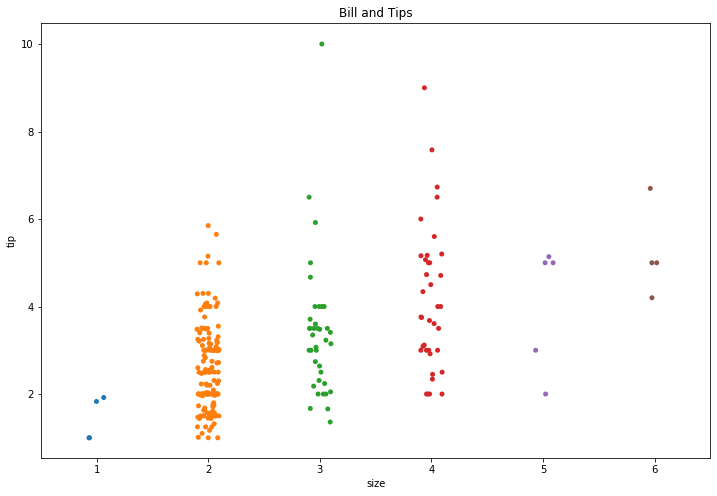

In [20]:
#to view the distribution of data points for categorical values,
#the stripplot is visualization tool in Seaborn
plt.figure(figsize = (12, 8))
#the stripplot is essentially a scatter plot representation for categorical values
#we have the party size, which is a categorical value along the x axis
sns.stripplot(x = 'size',
             y = 'tip',
             data = tips_data)
plt.title('Bill and Tips')
plt.show()

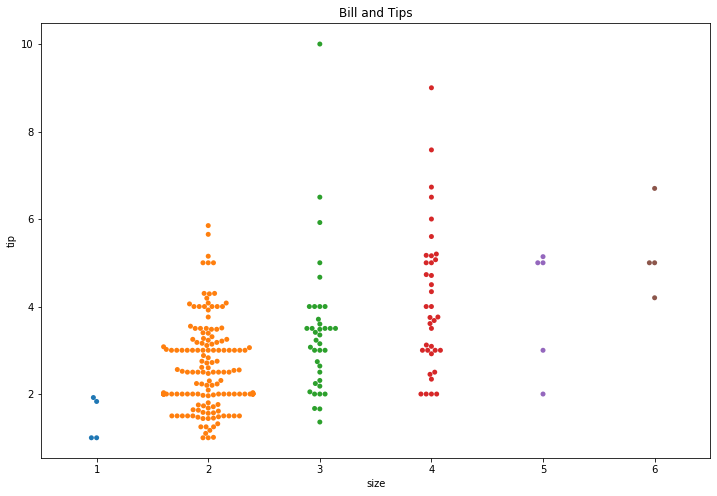

In [21]:
#to view the data in a spread out manner so that individual data points are visible
#you'll use a swarmplot
plt.figure(figsize = (12, 8))
sns.swarmplot(x = 'size',
             y = 'tip',
             data = tips_data)
plt.title('Bill and Tips')
plt.show()
#this is a scatterplot for each category represented

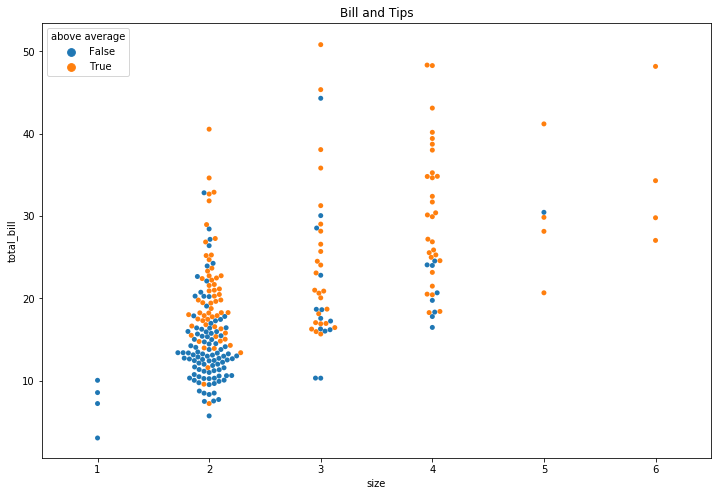

In [22]:
#the hue input argument, which allows to color the data based on a particular columns
#works with swarmplots and stripplots as well
plt.figure(figsize = (12, 8))
sns.swarmplot(x = 'size',
             y = 'total_bill',
             hue = 'above average', 
             data = tips_data)
plt.title('Bill and Tips')
plt.show()

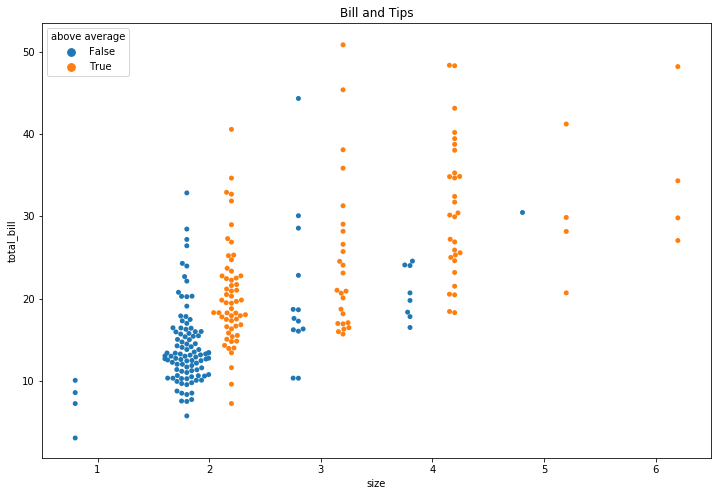

In [23]:
#if we want our data colored using different hues to be separated from
#one another, we can specify the argument dodge = True
plt.figure(figsize = (12, 8))
sns.swarmplot(x = 'size',
             y = 'total_bill',
             hue = 'above average', 
             data = tips_data, dodge = True)
plt.title('Bill and Tips')
plt.show()